<a href="https://colab.research.google.com/github/thepianist9/AutoEncoder-Cifar10/blob/master/Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
 df = pd.read_csv("/content/drive/My Drive/train.csv")

In [5]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [6]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829948,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375679,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.00000

In [7]:
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


# **Number of targets in right proportion?**

In [8]:
print(df.target.value_counts().values)

[573518  21694]


Number of 0's are more than number of 1's and are out of proportion.
The ratio of 0's to 1's is ~ 27:1.  
**Which shows a High Imbalance in the dataset.**

Creating a list of Binary, Categorical and Continuous features for easy preprocessing from the dataset.

In [9]:
categorical = []
binary = []
continuous = []

for i in df.columns:
  if 'cat' in i:
    categorical.append(i)
  elif 'bin' in i:
    binary.append(i)
  else:
    continuous.append(i)

In [10]:
df[continuous].describe()

,id,target,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,4.423318,0.012451,7.299922,0.610991,0.439184,0.551102,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,4.293678e+05,0.187401,1.983789,2.699902,0.127545,3.546042,0.287643,0.404264,0.793506,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,2.000000,0.000000,5.000000,0.400000,0.200000,0.525000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,7.435475e+05,0.000000,1.000000,4.000000,0.000000,7.000000,0.700000,0.300000,0.720677,3.000000,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,1.115549e+06,0.000000,3.000000,6.000000,0.000000,10.000000,0.900000,0.600000,1.000000,3.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,1.488027e+06,1.000000,7.000000,11.000000,4.000000,13.000000,0.900000,1.800000,4.037945,3.000000,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


*   The "target" feature is a binary valued column
*   In certain features of the dataset the MEAN is more than the MEDIAN and the MAX value is more than the 75th percentile value which suggests that there are outliers in the data.

In [11]:
print("3. number of categorical features:", len(categorical))
print("4. number of binary features:", len(binary))

3. number of categorical features: 14
4. number of binary features: 17


*   number of categorical features: 14
*   number of binary features: 17

In [12]:
continuous

['id',
 'target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

Replacing the "-1" values with np.NaN

In [13]:
#checking columns with null values
df = df.replace(-1, value=np.NaN)
df.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          0
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [14]:
df['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

1. Imbalance in the target data is about: 3.78%. 
2. Totally 9 features or columns in the dataset have missing values.
3. "ps_car_03_cat" and "ps_car_05_cat" are the two features with the most null values.

Using Simple Imputer to impute the Nominal features using mean.

In [15]:
#continuous using imputer and mean of the column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[continuous[2:]]=pd.DataFrame(imputer.fit_transform(df[continuous[2:]]))

In [16]:
corr_list = []
corr = df[continuous].corr()

def find_corr(row):
    for i in continuous:
        if row[i]>=0.5 and row[i]<1 and i not in corr_list:
            corr_list.append(i)
    return

var = corr.apply(find_corr, axis = 1)

The nominal variables with a correlation value of more than **0.5** are:      

*   ps_reg_03
*   ps_reg_02
*   ps_car_13
*   ps_car_14
*   ps_car_12
*   ps_car_15







/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


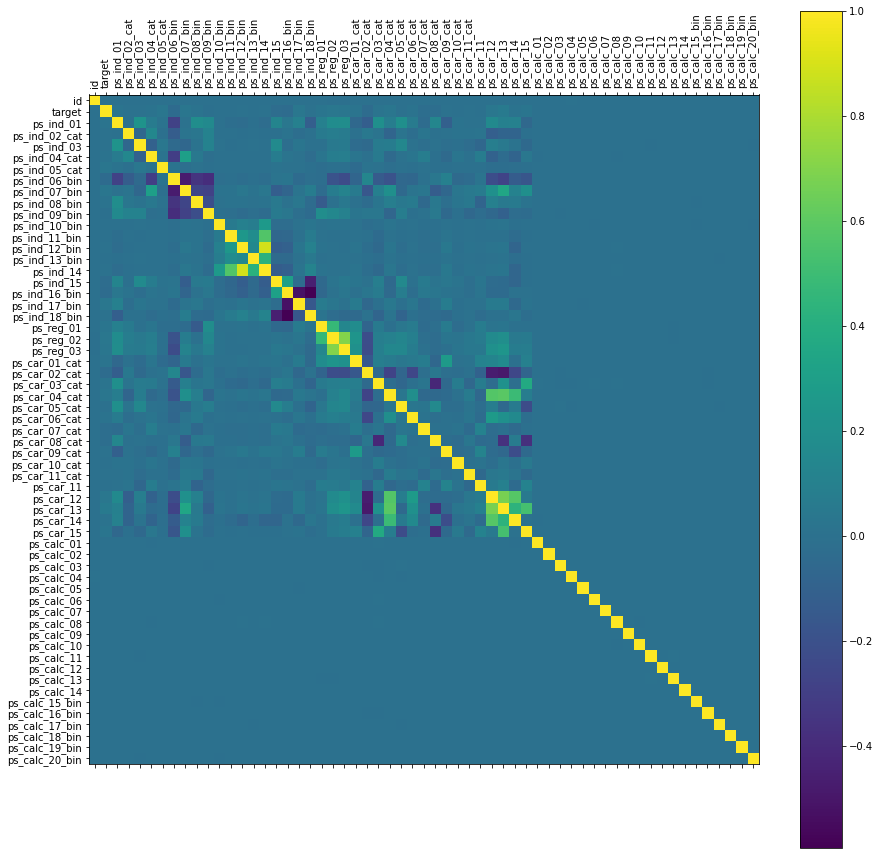

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))

plt.matshow(df.corr(), 1)
plt.xticks(range(len(df.columns)), df.columns, rotation = 90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

The level of correlation is confirmed with the help of the correlation plot.

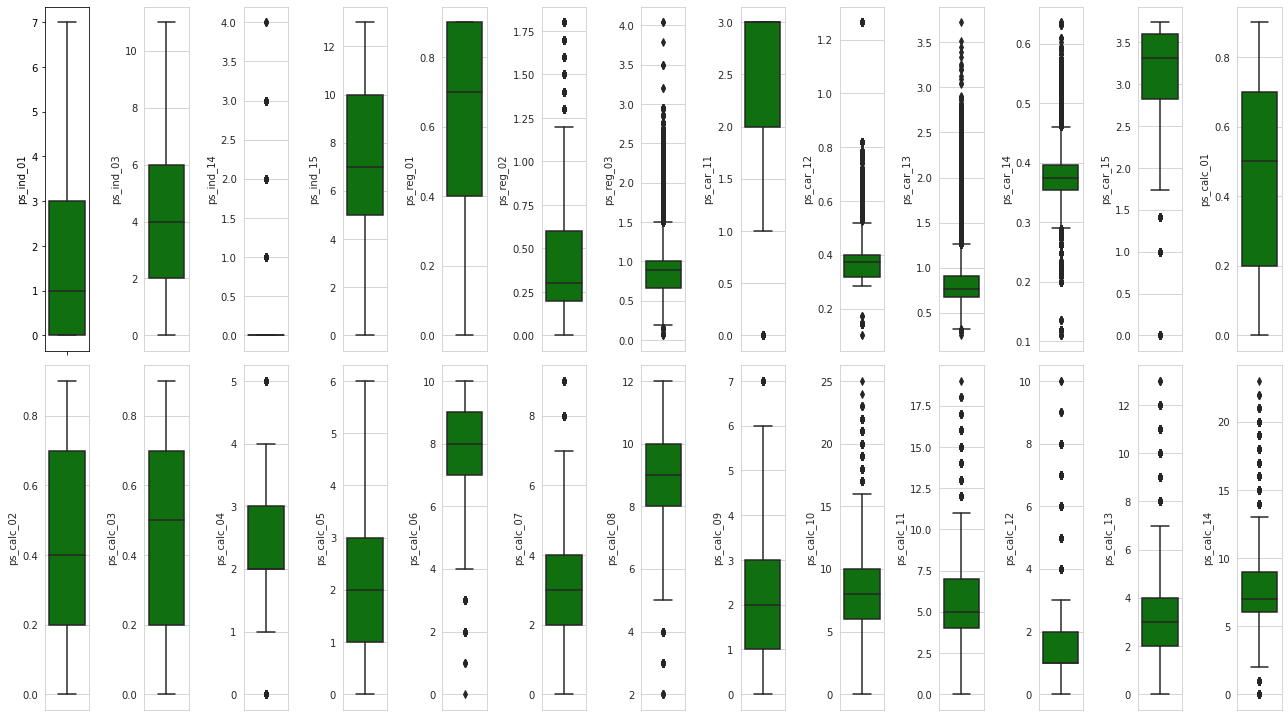

In [18]:
l = len(continuous)
number_of_columns=13
number_of_rows = l-1/number_of_columns
plt.figure(figsize=(number_of_columns+5,5*number_of_rows))
for i in range(2,l):
    plt.subplot(number_of_rows + 1,number_of_columns,i-1)
    sns.set_style('whitegrid')
    sns.boxplot(df[continuous[i]],color='green',orient='v')
    plt.tight_layout()

plt.show()

The Whisker plots plotted above confirms the presence of outliers in the data in the columns:                                 
*   ps_reg_02
*   ps_reg_03
*   ps_car_12
*   ps_car_13
*   ps_car14
*   ps_car_15
*   ps_calc_10

The Distribution plot further shows the skewness and the high variation in the continuous data features.

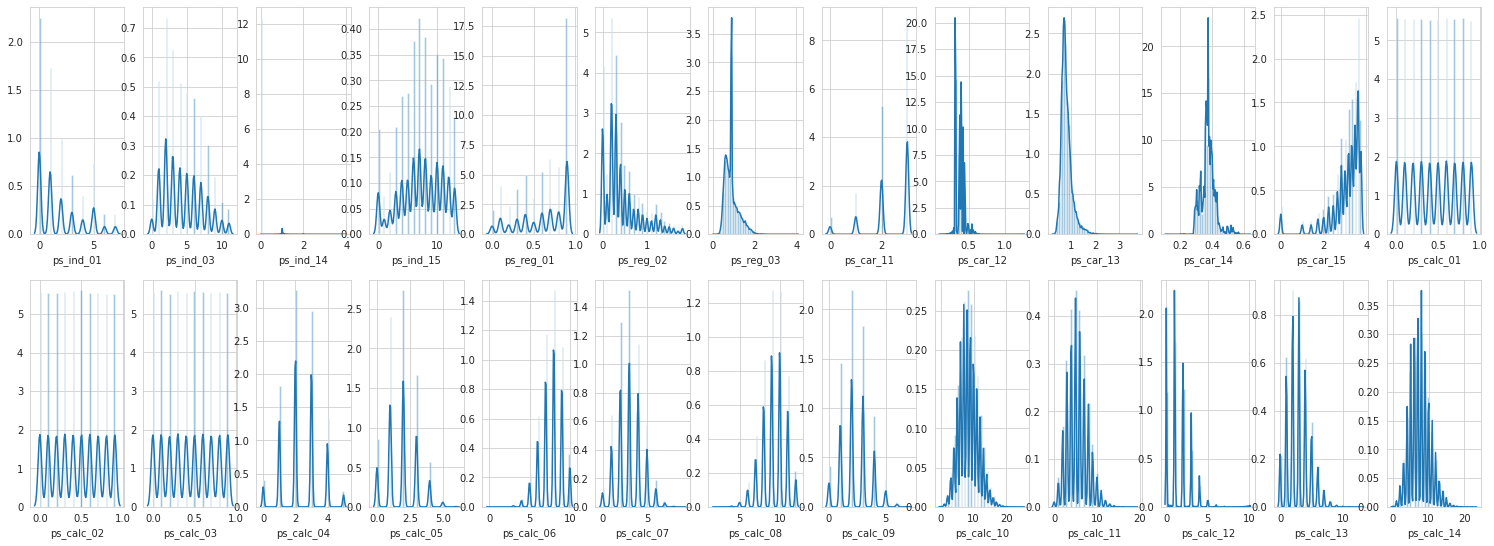

In [19]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(2,l):
    plt.subplot(number_of_rows + 1,number_of_columns,i-1)
    sns.distplot(df[continuous[i]],kde=True) 

One Hot Encoding the categorical features:

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
for i in categorical:
    df = pd.concat([df,pd.get_dummies(df[i], prefix=i)],axis=1)
    df.drop([i],axis=1, inplace=True)

*   Number of Records when minority at 12%: 7083

Using downsampling to balance the data set to a ratio of ~ 4:1.




In [21]:
from sklearn.utils import resample
df_majority = df[df.target == 0]
df_minority = df[df.target == 1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=80000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.target.value_counts()

0    80000
1    21694
Name: target, dtype: int64

In [22]:
X = df_downsampled.iloc[:,2:]
y = df_downsampled.iloc[:,1]

Applying standard scaling on the continuous valued variables to remove the negative effects of the skewness and high variation in the data.

In [23]:
#Scaling the contiuous values to have their centre as 0
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X[continuous[2:]])
X = scaler.transform(X[continuous[2:]])

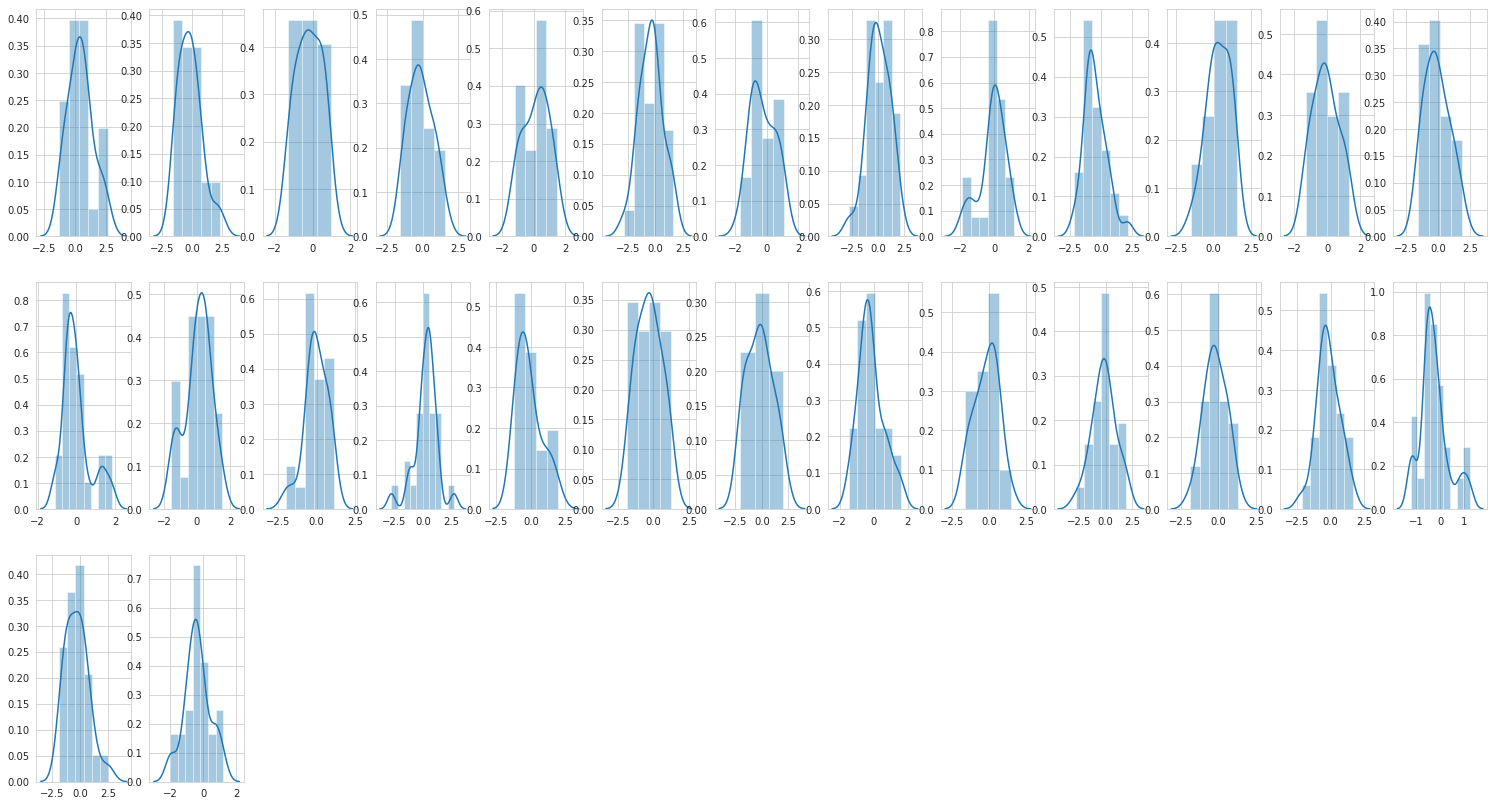

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
l = len(continuous)
number_of_columns=13
number_of_rows = l-1/number_of_columns

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(l):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(X[i],kde=True) 


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight={1:3.5, 0:1})
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 3.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = lr.predict(x_test)

In [28]:
y.value_counts()

0    80000
1    21694
Name: target, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

score = accuracy_score(y_test, y_pred)
metrics = precision_recall_fscore_support(y_test, y_pred)

print(metrics)
print(score)

       0     1
0  17174  9326
1   3665  3395
(array([0.82412784, 0.26688153]), array([0.64807547, 0.48087819]), array([0.72557511, 0.34325868]), array([26500,  7060]))
0.6129022646007152


Since the recall values for class 1 is very low hence the f1-score value is nearly 0 for class 1.

On increasing the class weight the f1-score increases from 0.008->0.34.

Number of misclassified predictions are still high which shows ambiguity in the prediction i.e.if a person will claim the insurance or no

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



param_C = [0.1]
param_grid = {'C': param_C, 'kernel': ['linear'], 'gamma': [0.1], 'max_iter' : [20000], 'random_state': [42], 'class_weight':[{1:1, 0:1}, {1:3.5, 0:1}, {1:2, 0:1}]}

clf = GridSearchCV(SVC(), cv = 5, param_grid= param_grid, refit=True)

clf.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/s

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3.5},
                                          {0: 1, 1: 2}],
                         'gamma': [0.1], 'kernel': ['linear'],
                         'max_iter': [20000], 'random_state': [42]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
clf.best_params_

{'C': 0.1,
 'class_weight': {0: 1, 1: 1},
 'gamma': 0.1,
 'kernel': 'linear',
 'max_iter': 20000,
 'random_state': 42}

In [32]:
from sklearn.svm import SVC

svc = SVC(C=0.1, class_weight={0:1, 1:1}, gamma=0.1, kernel = 'linear', max_iter=20000, random_state=42)

In [33]:
svc.fit(x_train, y_train)
y_pred1 = svc.predict(x_test)
print(pd.DataFrame(confusion_matrix(y_test, y_pred1)))

score = accuracy_score(y_test, y_pred1)
metrics = precision_recall_fscore_support(y_test, y_pred1)

print(metrics)
print(score)

       0  1
0  26500  0
1   7060  0
(array([0.78963051, 0.        ]), array([1., 0.]), array([0.88245088, 0.        ]), array([26500,  7060]))
0.7896305125148987


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Upsampling the minority data to achieve a better recall and f1-score.

In [34]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=80000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_minority_upsampled, df_downsampled[df_downsampled['target'] == 0]])
 
# Display new class counts
df_upsampled.target.value_counts()

1    80000
0    80000
Name: target, dtype: int64

In [35]:
X_bal = df_upsampled.iloc[:,2:]
y_bal = df_upsampled.iloc[:,1]

x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.25, random_state=42)

In [36]:
svc.fit(x_train_bal, y_train_bal)
predict_svc = svc.predict(x_test_bal)

score = accuracy_score(y_test_bal, predict_svc)
metrics = precision_recall_fscore_support(y_test_bal, predict_svc)

print("**************************************")
print("Accuracy Score:", score)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, predict_svc)), "\n")
print("**************************************")
print(pd.DataFrame(metrics, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


**************************************
Accuracy Score: 0.502225
**************************************
Confusion Matrix:
      0      1
0  6663  13492
1  6419  13426 

**************************************
                      0             1
Precision      0.509326      0.498774
Recall         0.330588      0.676543
F1-score       0.400939      0.574215
Support    20155.000000  19845.000000 



On a upsmapled-balanced dataset the model is predicting even minority class labels but still sccuracy is low with a accuracy score of 50%


In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(kernel='linear', C=0.1, class_weight='balanced', verbose=True, random_state=42)
xgb.fit(x_train_bal, y_train_bal)

XGBClassifier(C=0.1, base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, kernel='linear', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbose=True, verbosity=1)

In [38]:
predict_xgb = xgb.predict(x_test_bal)
score = accuracy_score(y_test_bal, predict_xgb)
metrics = precision_recall_fscore_support(y_test_bal, predict_xgb)

print("**************************************")
print("Accuracy Score:", score)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, predict_xgb)))
print("**************************************")
print(pd.DataFrame(metrics, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

**************************************
Accuracy Score: 0.602625
**************************************
Confusion Matrix:
       0      1
0  12675   7480
1   8415  11430
**************************************
                      0             1
Precision      0.600996      0.604442
Recall         0.628876      0.575964
F1-score       0.614620      0.589859
Support    20155.000000  19845.000000 



XGB performs better than SVC in this case with a accuracy score of 60%

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Dropout


Using TensorFlow backend.


In [40]:
x_train_bal.shape

(120000, 218)

In [47]:
model1 = Sequential()

model1.add(Dense(218, input_shape=(218,)))
model1.add(Dropout(rate=0.2))
model1.add(BatchNormalization())

model1.add(Dense(436, activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(BatchNormalization())

model1.add(Dense(436, activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(BatchNormalization())

model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 218)               47742     
_________________________________________________________________
dropout_12 (Dropout)         (None, 218)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 218)               872       
_________________________________________________________________
dense_16 (Dense)             (None, 436)               95484     
_________________________________________________________________
dropout_13 (Dropout)         (None, 436)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 436)               1744      
_________________________________________________________________
dense_17 (Dense)             (None, 436)              

In [48]:
model1.fit(x_train_bal, y_train_bal, batch_size=250, epochs=200, verbose=1, validation_split=0.2)

Train on 96000 samples, validate on 24000 samples
Epoch 1/200
96000/96000 [==============================] - 5s 55us/step - loss: 0.7232 - accuracy: 0.5515 - val_loss: 0.6753 - val_accuracy: 0.5766
Epoch 2/200
96000/96000 [==============================] - 5s 50us/step - loss: 0.6713 - accuracy: 0.5840 - val_loss: 0.6708 - val_accuracy: 0.5866
Epoch 3/200
96000/96000 [==============================] - 5s 50us/step - loss: 0.6662 - accuracy: 0.5948 - val_loss: 0.6691 - val_accuracy: 0.5918
Epoch 4/200
96000/96000 [==============================] - 5s 50us/step - loss: 0.6641 - accuracy: 0.5974 - val_loss: 0.6721 - val_accuracy: 0.5889
Epoch 5/200
96000/96000 [==============================] - 5s 50us/step - loss: 0.6622 - accuracy: 0.6001 - val_loss: 0.6684 - val_accuracy: 0.5920
Epoch 6/200
96000/96000 [==============================] - 5s 50us/step - loss: 0.6600 - accuracy: 0.6049 - val_loss: 0.6646 - val_accuracy: 0.5992
Epoch 7/200
96000/96000 [==============================] - 5s 

In [49]:
model2 = Sequential()

model2.add(Dense(218, input_shape=(218,)))
model2.add(Dropout(rate=0.2))
model2.add(BatchNormalization())

model2.add(Dense(436, activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(BatchNormalization())

model2.add(Dense(436, activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(BatchNormalization())

model2.add(Dense(436, activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(BatchNormalization())

model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 218)               47742     
_________________________________________________________________
dropout_15 (Dropout)         (None, 218)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 218)               872       
_________________________________________________________________
dense_20 (Dense)             (None, 436)               95484     
_________________________________________________________________
dropout_16 (Dropout)         (None, 436)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 436)               1744      
_________________________________________________________________
dense_21 (Dense)             (None, 436)              

In [50]:
model2.fit(x_train_bal, y_train_bal, batch_size=250, epochs=200, verbose=1, validation_split=0.2)

Train on 96000 samples, validate on 24000 samples
Epoch 1/200
96000/96000 [==============================] - 7s 74us/step - loss: 0.7170 - accuracy: 0.5490 - val_loss: 0.6786 - val_accuracy: 0.5765
Epoch 2/200
96000/96000 [==============================] - 6s 63us/step - loss: 0.6717 - accuracy: 0.5842 - val_loss: 0.6690 - val_accuracy: 0.5942
Epoch 3/200
96000/96000 [==============================] - 6s 64us/step - loss: 0.6665 - accuracy: 0.5929 - val_loss: 0.6693 - val_accuracy: 0.5891
Epoch 4/200
96000/96000 [==============================] - 6s 64us/step - loss: 0.6645 - accuracy: 0.5977 - val_loss: 0.6662 - val_accuracy: 0.5973
Epoch 5/200
96000/96000 [==============================] - 6s 63us/step - loss: 0.6625 - accuracy: 0.6007 - val_loss: 0.6646 - val_accuracy: 0.5985
Epoch 6/200
96000/96000 [==============================] - 6s 64us/step - loss: 0.6607 - accuracy: 0.6050 - val_loss: 0.6675 - val_accuracy: 0.5989
Epoch 7/200
96000/96000 [==============================] - 6s 

In [52]:
model3 = Sequential()

model3.add(Dense(218, input_shape=(218,)))
model3.add(Dropout(rate=0.2))
model3.add(BatchNormalization())

model3.add(Dense(436, activation='relu'))
model3.add(Dropout(rate=0.2))
model3.add(BatchNormalization())

model3.add(Dense(436, activation='relu'))
model3.add(Dropout(rate=0.2))
model3.add(BatchNormalization())

model3.add(Dense(436, activation='relu'))
model3.add(Dropout(rate=0.2))
model3.add(BatchNormalization())

model3.add(Dense(436, activation='relu'))
model3.add(Dropout(rate=0.2))
model3.add(BatchNormalization())

model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 218)               47742     
_________________________________________________________________
dropout_19 (Dropout)         (None, 218)               0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 218)               872       
_________________________________________________________________
dense_25 (Dense)             (None, 436)               95484     
_________________________________________________________________
dropout_20 (Dropout)         (None, 436)               0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 436)               1744      
_________________________________________________________________
dense_26 (Dense)             (None, 436)              

In [53]:
model3.fit(x_train_bal, y_train_bal, batch_size=250, epochs=200, verbose=1, validation_split=0.2)

Train on 96000 samples, validate on 24000 samples
Epoch 1/200
96000/96000 [==============================] - 9s 95us/step - loss: 0.7283 - accuracy: 0.5409 - val_loss: 0.6773 - val_accuracy: 0.5791
Epoch 2/200
96000/96000 [==============================] - 8s 79us/step - loss: 0.6729 - accuracy: 0.5851 - val_loss: 0.6815 - val_accuracy: 0.5817
Epoch 3/200
96000/96000 [==============================] - 8s 80us/step - loss: 0.6675 - accuracy: 0.5928 - val_loss: 0.6705 - val_accuracy: 0.5900
Epoch 4/200
96000/96000 [==============================] - 8s 79us/step - loss: 0.6654 - accuracy: 0.5967 - val_loss: 0.6658 - val_accuracy: 0.5957
Epoch 5/200
96000/96000 [==============================] - 8s 79us/step - loss: 0.6635 - accuracy: 0.5999 - val_loss: 0.6651 - val_accuracy: 0.5935
Epoch 6/200
96000/96000 [==============================] - 8s 79us/step - loss: 0.6616 - accuracy: 0.6030 - val_loss: 0.6657 - val_accuracy: 0.5980
Epoch 7/200
96000/96000 [==============================] - 8s 

In [54]:
model4 = Sequential()

model4.add(Dense(218, input_shape=(218,)))
model4.add(Dropout(rate=0.2))
model4.add(BatchNormalization())

model4.add(Dense(436, activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(BatchNormalization())

model4.add(Dense(436, activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(BatchNormalization())

model4.add(Dense(436, activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(BatchNormalization())

model4.add(Dense(436, activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(BatchNormalization())

model4.add(Dense(436, activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(BatchNormalization())

model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 218)               47742     
_________________________________________________________________
dropout_24 (Dropout)         (None, 218)               0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 218)               872       
_________________________________________________________________
dense_31 (Dense)             (None, 436)               95484     
_________________________________________________________________
dropout_25 (Dropout)         (None, 436)               0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 436)               1744      
_________________________________________________________________
dense_32 (Dense)             (None, 436)              

In [55]:
model4.fit(x_train_bal, y_train_bal, batch_size=250, epochs=200, verbose=1, validation_split=0.2)

Train on 96000 samples, validate on 24000 samples
Epoch 1/200
96000/96000 [==============================] - 9s 98us/step - loss: 0.7298 - accuracy: 0.5378 - val_loss: 0.6806 - val_accuracy: 0.5716
Epoch 2/200
96000/96000 [==============================] - 8s 86us/step - loss: 0.6753 - accuracy: 0.5809 - val_loss: 0.6737 - val_accuracy: 0.5878
Epoch 3/200
96000/96000 [==============================] - 8s 86us/step - loss: 0.6694 - accuracy: 0.5904 - val_loss: 0.6740 - val_accuracy: 0.5884
Epoch 4/200
96000/96000 [==============================] - 8s 83us/step - loss: 0.6665 - accuracy: 0.5954 - val_loss: 0.6703 - val_accuracy: 0.5916
Epoch 5/200
96000/96000 [==============================] - 8s 84us/step - loss: 0.6641 - accuracy: 0.5993 - val_loss: 0.6732 - val_accuracy: 0.5950
Epoch 6/200
96000/96000 [==============================] - 8s 83us/step - loss: 0.6629 - accuracy: 0.6034 - val_loss: 0.6667 - val_accuracy: 0.5926
Epoch 7/200
96000/96000 [==============================] - 8s 

In [56]:
model5 = Sequential()

model5.add(Dense(218, input_shape=(218,)))
model5.add(Dropout(rate=0.2))
model5.add(BatchNormalization())

model5.add(Dense(436, activation='relu'))
model5.add(Dropout(rate=0.2))
model5.add(BatchNormalization())

model5.add(Dense(436, activation='relu'))
model5.add(Dropout(rate=0.2))
model5.add(BatchNormalization())

model5.add(Dense(436, activation='relu'))
model5.add(Dropout(rate=0.2))
model5.add(BatchNormalization())

model5.add(Dense(436, activation='relu'))
model5.add(Dropout(rate=0.2))
model5.add(BatchNormalization())

model5.add(Dense(436, activation='relu'))
model5.add(Dropout(rate=0.2))
model5.add(BatchNormalization())

model5.add(Dense(436, activation='relu'))
model5.add(Dropout(rate=0.2))
model5.add(BatchNormalization())

model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 218)               47742     
_________________________________________________________________
dropout_30 (Dropout)         (None, 218)               0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 218)               872       
_________________________________________________________________
dense_38 (Dense)             (None, 436)               95484     
_________________________________________________________________
dropout_31 (Dropout)         (None, 436)               0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 436)               1744      
_________________________________________________________________
dense_39 (Dense)             (None, 436)              

In [57]:
model5.fit(x_train_bal, y_train_bal, batch_size=250, epochs=200, verbose=1, validation_split=0.2)

Train on 96000 samples, validate on 24000 samples
Epoch 1/200
96000/96000 [==============================] - 10s 102us/step - loss: 0.7337 - accuracy: 0.5339 - val_loss: 0.6783 - val_accuracy: 0.5730
Epoch 2/200
96000/96000 [==============================] - 8s 88us/step - loss: 0.6769 - accuracy: 0.5771 - val_loss: 0.6735 - val_accuracy: 0.5888
Epoch 3/200
96000/96000 [==============================] - 9s 90us/step - loss: 0.6694 - accuracy: 0.5892 - val_loss: 0.6709 - val_accuracy: 0.5866
Epoch 4/200
96000/96000 [==============================] - 8s 88us/step - loss: 0.6669 - accuracy: 0.5973 - val_loss: 0.6708 - val_accuracy: 0.5923
Epoch 5/200
96000/96000 [==============================] - 8s 88us/step - loss: 0.6649 - accuracy: 0.5985 - val_loss: 0.6711 - val_accuracy: 0.5954
Epoch 6/200
96000/96000 [==============================] - 8s 88us/step - loss: 0.6636 - accuracy: 0.6016 - val_loss: 0.6755 - val_accuracy: 0.5977
Epoch 7/200
96000/96000 [==============================] - 9

In [58]:
model6 = Sequential()

model6.add(Dense(218, input_shape=(218,)))
model6.add(Dropout(rate=0.2))
model6.add(BatchNormalization())

model6.add(Dense(436, activation='relu'))
model6.add(Dropout(rate=0.2))
model6.add(BatchNormalization())

model6.add(Dense(436, activation='relu'))
model6.add(Dropout(rate=0.2))
model6.add(BatchNormalization())

model6.add(Dense(436, activation='relu'))
model6.add(Dropout(rate=0.2))
model6.add(BatchNormalization())

model6.add(Dense(436, activation='relu'))
model6.add(Dropout(rate=0.2))
model6.add(BatchNormalization())

model6.add(Dense(436, activation='relu'))
model6.add(Dropout(rate=0.2))
model6.add(BatchNormalization())

model6.add(Dense(436, activation='relu'))
model6.add(Dropout(rate=0.2))
model6.add(BatchNormalization())

model6.add(Dense(436, activation='relu'))
model6.add(Dropout(rate=0.2))
model6.add(BatchNormalization())

model6.add(Dense(436, activation='relu'))
model6.add(Dropout(rate=0.2))
model6.add(BatchNormalization())

model6.add(Dense(1, activation='sigmoid'))

model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 218)               47742     
_________________________________________________________________
dropout_37 (Dropout)         (None, 218)               0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 218)               872       
_________________________________________________________________
dense_46 (Dense)             (None, 436)               95484     
_________________________________________________________________
dropout_38 (Dropout)         (None, 436)               0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 436)               1744      
_________________________________________________________________
dense_47 (Dense)             (None, 436)              

In [59]:
model6.fit(x_train_bal, y_train_bal, batch_size=250, epochs=200, verbose=1, validation_split=0.2)

Train on 96000 samples, validate on 24000 samples
Epoch 1/200
96000/96000 [==============================] - 13s 134us/step - loss: 0.7412 - accuracy: 0.5159 - val_loss: 0.6855 - val_accuracy: 0.5527
Epoch 2/200
96000/96000 [==============================] - 11s 114us/step - loss: 0.6830 - accuracy: 0.5636 - val_loss: 0.6740 - val_accuracy: 0.5802
Epoch 3/200
96000/96000 [==============================] - 11s 114us/step - loss: 0.6726 - accuracy: 0.5855 - val_loss: 0.6733 - val_accuracy: 0.5907
Epoch 4/200
96000/96000 [==============================] - 11s 115us/step - loss: 0.6689 - accuracy: 0.5939 - val_loss: 0.6791 - val_accuracy: 0.5943
Epoch 5/200
96000/96000 [==============================] - 11s 115us/step - loss: 0.6672 - accuracy: 0.5966 - val_loss: 0.6758 - val_accuracy: 0.5940
Epoch 6/200
96000/96000 [==============================] - 11s 113us/step - loss: 0.6652 - accuracy: 0.5996 - val_loss: 0.6711 - val_accuracy: 0.5949
Epoch 7/200
96000/96000 [=========================

In [ ]:
y_pred4 = model3.predict_classes(x_test_bal)
score_n4 = accuracy_score(y_test_bal, y_pred4)
metrics_n4 = precision_recall_fscore_support(y_test_bal, y_pred4)

print("**************************************")
print("Accuracy Score:", score_n4)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, y_pred4)))
print("**************************************")
print(pd.DataFrame(metrics_n4, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

In [67]:
y_pred1 = model1.predict_classes(x_test_bal)
score_n1 = accuracy_score(y_test_bal, y_pred1)
metrics_n1 = precision_recall_fscore_support(y_test_bal, y_pred1)

print("**************************************")
print("Accuracy Score:", score_n1)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, y_pred1)))
print("**************************************")
print(pd.DataFrame(metrics_n1, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

**************************************
Accuracy Score: 0.8369
**************************************
Confusion Matrix:
       0      1
0  15737   4418
1   2106  17739
**************************************
                      0             1
Precision      0.881971      0.800605
Recall         0.780799      0.893878
F1-score       0.828307      0.844674
Support    20155.000000  19845.000000 



In [70]:
y_pred2 = model2.predict_classes(x_test_bal)
score_n2 = accuracy_score(y_test_bal, y_pred2)
metrics_n2 = precision_recall_fscore_support(y_test_bal, y_pred2)

print("**************************************")
print("Accuracy Score:", score_n2)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, y_pred2)))
print("**************************************")
print(pd.DataFrame(metrics_n2, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

**************************************
Accuracy Score: 0.83395
**************************************
Confusion Matrix:
       0      1
0  15264   4891
1   1751  18094
**************************************
                      0             1
Precision      0.897091      0.787209
Recall         0.757331      0.911766
F1-score       0.821308      0.844922
Support    20155.000000  19845.000000 



In [69]:
y_pred3 = model3.predict_classes(x_test_bal)
score_n3 = accuracy_score(y_test_bal, y_pred3)
metrics_n3 = precision_recall_fscore_support(y_test_bal, y_pred3)

print("**************************************")
print("Accuracy Score:", score_n3)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, y_pred3)))
print("**************************************")
print(pd.DataFrame(metrics_n3, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

**************************************
Accuracy Score: 0.839825
**************************************
Confusion Matrix:
       0      1
0  15667   4488
1   1919  17926
**************************************
                      0             1
Precision      0.890879      0.799768
Recall         0.777326      0.903301
F1-score       0.830238      0.848387
Support    20155.000000  19845.000000 



In [71]:
y_pred4 = model4.predict_classes(x_test_bal)
score_n4 = accuracy_score(y_test_bal, y_pred4)
metrics_n4 = precision_recall_fscore_support(y_test_bal, y_pred4)

print("**************************************")
print("Accuracy Score:", score_n4)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, y_pred4)))
print("**************************************")
print(pd.DataFrame(metrics_n4, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

**************************************
Accuracy Score: 0.838925
**************************************
Confusion Matrix:
       0      1
0  15529   4626
1   1817  18028
**************************************
                      0             1
Precision      0.895250      0.795798
Recall         0.770479      0.908440
F1-score       0.828191      0.848396
Support    20155.000000  19845.000000 



In [72]:
y_pred5 = model5.predict_classes(x_test_bal)
score_n5 = accuracy_score(y_test_bal, y_pred5)
metrics_n5 = precision_recall_fscore_support(y_test_bal, y_pred5)

print("**************************************")
print("Accuracy Score:", score_n5)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, y_pred5)))
print("**************************************")
print(pd.DataFrame(metrics_n5, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

**************************************
Accuracy Score: 0.832525
**************************************
Confusion Matrix:
       0      1
0  15311   4844
1   1855  17990
**************************************
                      0             1
Precision      0.891938      0.787860
Recall         0.759663      0.906526
F1-score       0.820503      0.843038
Support    20155.000000  19845.000000 



In [73]:
y_pred6 = model6.predict_classes(x_test_bal)
score_n6 = accuracy_score(y_test_bal, y_pred6)
metrics_n6 = precision_recall_fscore_support(y_test_bal, y_pred6)

print("**************************************")
print("Accuracy Score:", score_n6)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, y_pred6)))
print("**************************************")
print(pd.DataFrame(metrics_n6, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

**************************************
Accuracy Score: 0.843325
**************************************
Confusion Matrix:
       0      1
0  16208   3947
1   2320  17525
**************************************
                      0             1
Precision      0.874784      0.816179
Recall         0.804168      0.883094
F1-score       0.837991      0.848319
Support    20155.000000  19845.000000 



The number of neurons selected is less than double the number of input features with the One Hot Encoding.

Model 3 and model 6 performs better than the other models with four layers and 7 layers respectively and accuracy score of nearly 88% on the training set and about 84% on the test set.

Which are the most precise models trained so far.

